### Задание 1
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)...

In [83]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [84]:
boston = load_boston()

In [85]:
data = boston["data"]
feature_names = boston["feature_names"]
target = boston.target
X = pd.DataFrame(data, columns = feature_names)
y = pd.DataFrame(target, columns=["price"])

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [87]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.715000,-0.500320,1.033237,-0.278089,0.344643,-2.382098,1.124581,-1.059057,1.706891,1.578434,0.845343,-3.580942,3.085604
98,1.219719,-0.500320,1.033237,-0.278089,1.561057,0.204790,0.884955,-0.848260,1.706891,1.578434,0.845343,-3.595156,0.787522
99,1.177967,-0.500320,1.033237,-0.278089,0.344643,0.481403,1.124581,-1.071460,1.706891,1.578434,0.845343,-3.512491,1.233902
100,-0.401311,-0.500320,-0.943214,-0.278089,-0.914302,-0.424644,-0.838921,0.290806,-0.740922,-0.946166,0.081621,0.434230,0.056698


In [88]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

In [89]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


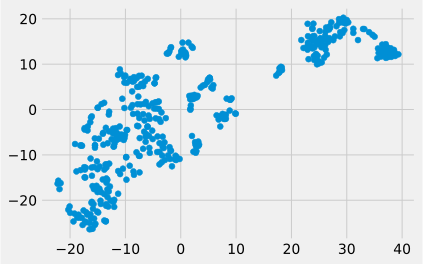

In [90]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

### Задание 2

2    191
1    127
0     86
dtype: int64


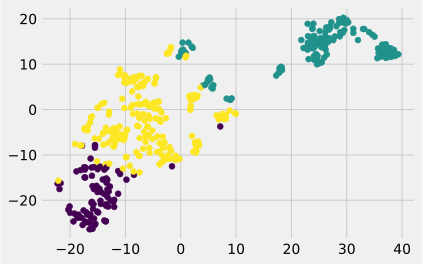

In [91]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)
labels_train = kmeans.fit_predict(X_train_scaled)
print(pd.value_counts(labels_train))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)

#labels_test = kmeans.predict(X_test_scaled)
#print(pd.value_counts(labels_test))
#fig = plt.figure()
#ax = fig.add_subplot()
#ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
#plt.show()
#X_test_tsne = tsne.fit_transform(X_test_scaled)
#plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c = labels_test)


In [92]:
y_train.mean()

price    22.796535
dtype: float64

In [93]:
print('cluster 0 {}'.format(y_train[labels_train == 0].mean()))
print('cluster 1 {}'.format(y_train[labels_train == 1].mean()))
print('cluster 2 {}'.format(y_train[labels_train == 2].mean()))

cluster 0 price    27.788372
dtype: float64
cluster 1 price    16.165354
dtype: float64
cluster 2 price    24.958115
dtype: float64


In [94]:
print('CRIM cluster 0 train {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('CRIM cluster 1 train {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('CRIM cluster 2 train {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

CRIM cluster 0 train 0.07356558139534886
CRIM cluster 1 train 10.797028425196853
CRIM cluster 2 train 0.42166020942408367


### Задание 3

In [95]:
labels_test = kmeans.predict(X_test_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)
print('cluster 0 {}'.format(y_test[labels_test == 0].mean()))
print('cluster 0 {}'.format(y_test[labels_test == 1].mean()))
print('cluster 0 {}'.format(y_test[labels_test == 2].mean()))

cluster 0 price    31.35
dtype: float64
cluster 0 price    16.437143
dtype: float64
cluster 0 price    21.860784
dtype: float64


In [96]:
print('CRIM cluster 0 {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('CRIM cluster 1 {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('CRIM cluster 2 {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

CRIM cluster 0 0.062060000000000004
CRIM cluster 1 10.165531142857143
CRIM cluster 2 0.26607882352941176


### Не из задания
#### Попробуем изучить характеристику " inertia_", чтобы определить оптимальное число кластеров на которое можно  разбить танные

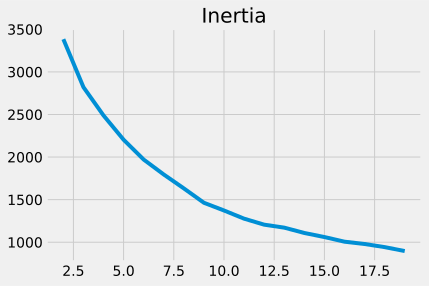

In [97]:
inertias = []

for i in range(2, 20):
    temp_model = KMeans(n_clusters = i, random_state = 100)
    temp_model.fit(X_train_scaled)
    
    temp_inertia = temp_model.inertia_
    
    inertias.append(temp_inertia)

plt.plot(range(2, 20), inertias)

plt.title('Inertia')

plt.show()

#### Попробуем разбить датасет на 3 кластера

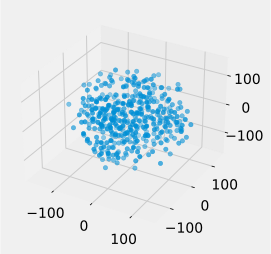

In [98]:
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
tsne2 = TSNE(n_components = 3, learning_rate = 250, random_state = 42)
X_train_tsne2 = tsne2.fit_transform(X_train_scaled)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_tsne2[:, 0], X_train_tsne2[:, 1], X_train_tsne2[:, 2],)

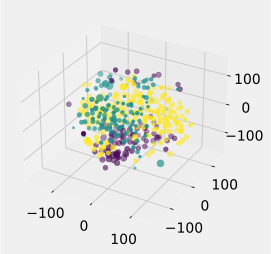

In [99]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
tsne3 = TSNE(n_components = 3, learning_rate = 250, random_state = 42)
X_train_tsne = tsne3.fit_transform(X_train_scaled)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], X_train_tsne[:, 2], c = labels_train, s = y_train)